#Step 1: Data Download and Initial Setup:
The data file was downloaded from Yahoo Finance using R.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

data = pd.read_csv('/content/HPG_VN.csv')

# Convert Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')  # Reset index after converting to datetime

# Calculate daily returns
data['Daily_Return'] = data['Adj Close'].pct_change()

/tmp/ipython-input-2-3262120177.py:13: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data['Daily_Return'] = data['Adj Close'].pct_change()


#Step 2: Plot Stock Prices

<Figure size 1200x600 with 0 Axes>

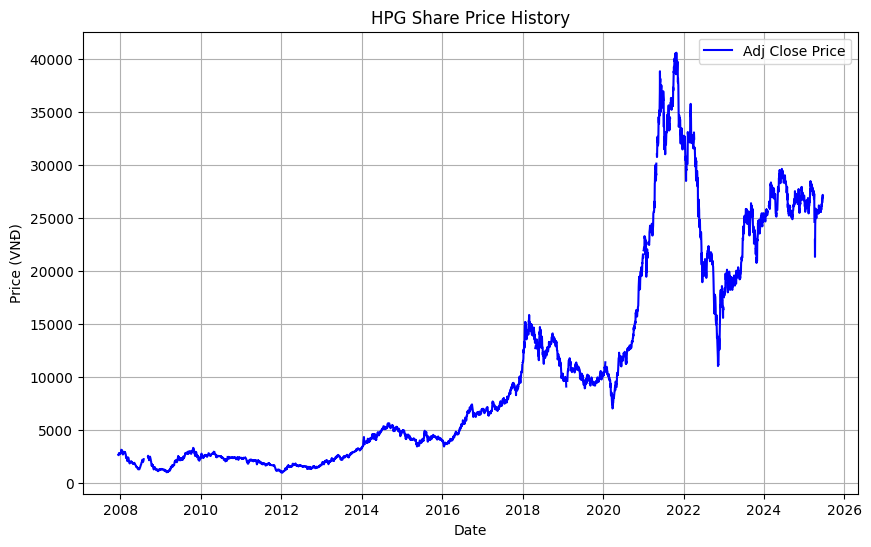

In [ ]:
# Plot the prices
plt.figure(figsize=(12, 6))
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Adj Close'], label='Adj Close Price', color='b')
plt.title('HPG Share Price History')
plt.xlabel('Date')
plt.ylabel('Price (VNĐ)')
plt.legend()
plt.grid(True)
plt.show()


# Task 1: Present a histogram of the daily returns

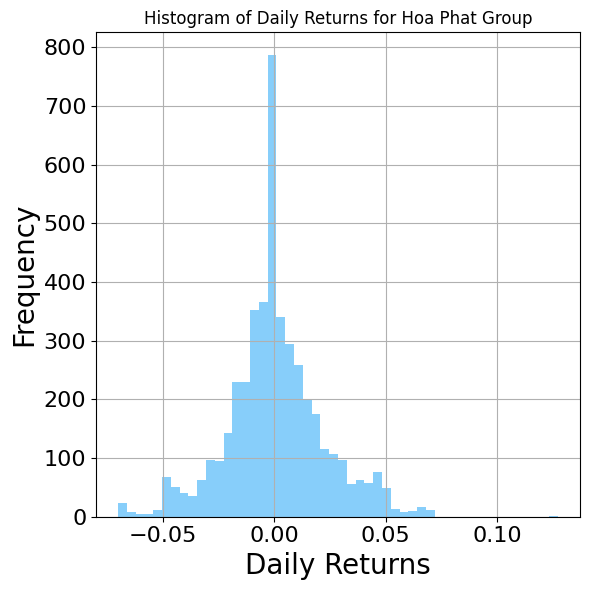

In [ ]:
plt.figure(figsize=(6, 6))
plt.hist(data['Daily_Return'].dropna(), bins=50, color='lightskyblue')
plt.title('Histogram of Daily Returns for Hoa Phat Group')
plt.xlabel('Daily Returns',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.grid(True)
plt.tight_layout()
plt.savefig('HPGAllTimeHistogram.png',dpi=610)
plt.show()


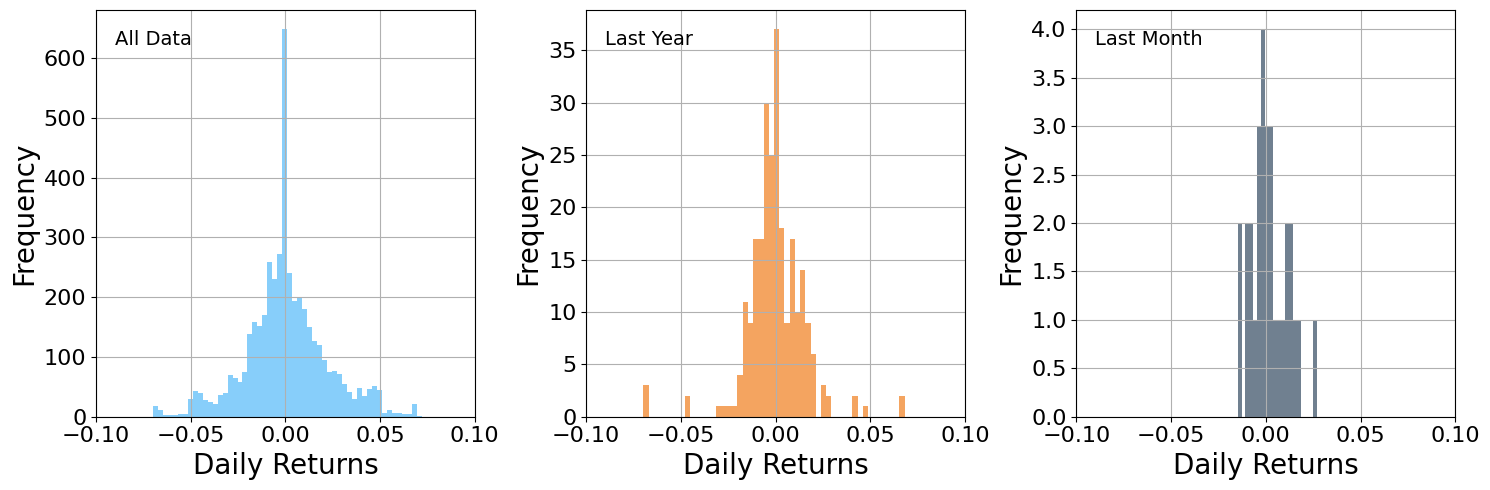

In [ ]:
# Plotting 3 subplots showing All Date, Last Year, Last Month
fig, axs = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 1, 1]})

time_periods = ['All Data', 'Last Year', 'Last Month']
time_intervals = [data['Daily_Return'].dropna(),
                  data['Daily_Return'].iloc[-252:].dropna(),
                  data['Daily_Return'].iloc[-30:].dropna()]

colors = ['lightskyblue', 'sandybrown', 'slategrey']  # Different colors for each subplot
bins = [75,50,20]

for i, (period, returns, color, bin_num) in enumerate(zip(time_periods, time_intervals, colors, bins)):
    axs[i].hist(returns, bins=bin_num, color=color)
    axs[i].set_xlabel('Daily Returns',fontsize=20)
    axs[i].set_ylabel('Frequency',fontsize=20)
    axs[i].tick_params(axis='both', which='major', labelsize=16)
    axs[i].text(0.05, 0.95, period, transform=axs[i].transAxes, fontsize=14, va='top')
    axs[i].set_xlim(-0.1, 0.1)
    axs[i].grid(True)

plt.tight_layout()
plt.savefig('HPG_Histograms.png',dpi=610)
plt.show()

# Task 2: Determine the best fit of the daily returns to a Normal distribution

Mean: 0.0007498938140242674
Standard Deviation: 0.021786604107865298


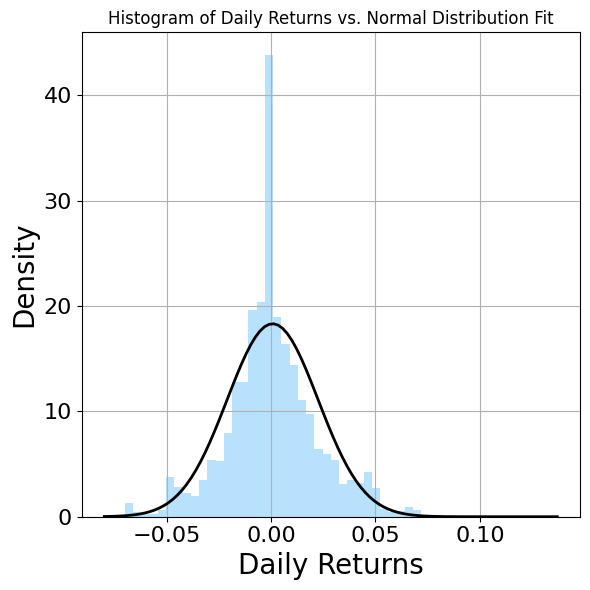

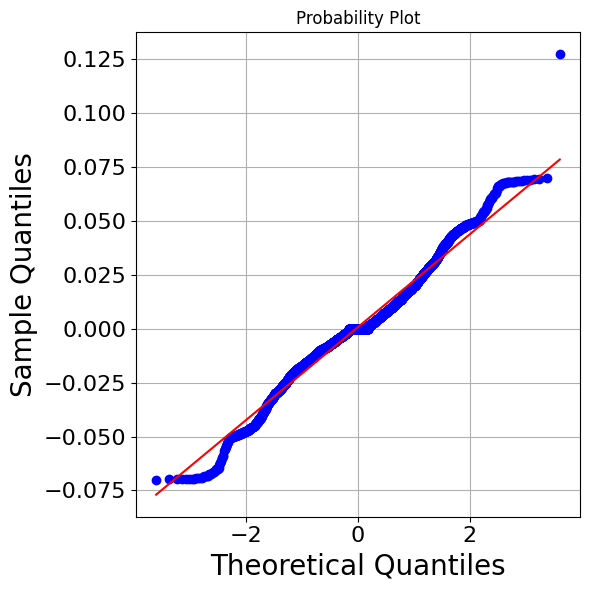

In [ ]:
# Task 2: Determine the best fit of the daily returns to a Normal distribution
mu, std = stats.norm.fit(data['Daily_Return'].dropna())
print("Mean:", mu)
print("Standard Deviation:", std)

# Plot histogram and best fit line
plt.figure(figsize=(6, 6))
plt.hist(data['Daily_Return'].dropna(), bins=50, density=True, alpha=0.6, color='lightskyblue')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Histogram of Daily Returns vs. Normal Distribution Fit')
plt.xlabel('Daily Returns',fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.grid(True)
plt.tight_layout()
plt.savefig('HPGHistogramwithGaussian.png',dpi=610)
plt.show()

plt.figure(figsize=(6, 6))
stats.probplot(data['Daily_Return'].dropna(), dist="norm", plot=plt)
plt.xlabel('Theoretical Quantiles', fontsize=20)
plt.ylabel('Sample Quantiles', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.grid(True)
plt.tight_layout()
plt.savefig('HPG_QQ_Plot.png', dpi=610)
plt.show()

# Task 3: Calculate annual drift and volatility of the share price

Annual Drift: 0.1889732411341154
Annual Volatility: 0.3458896218765212


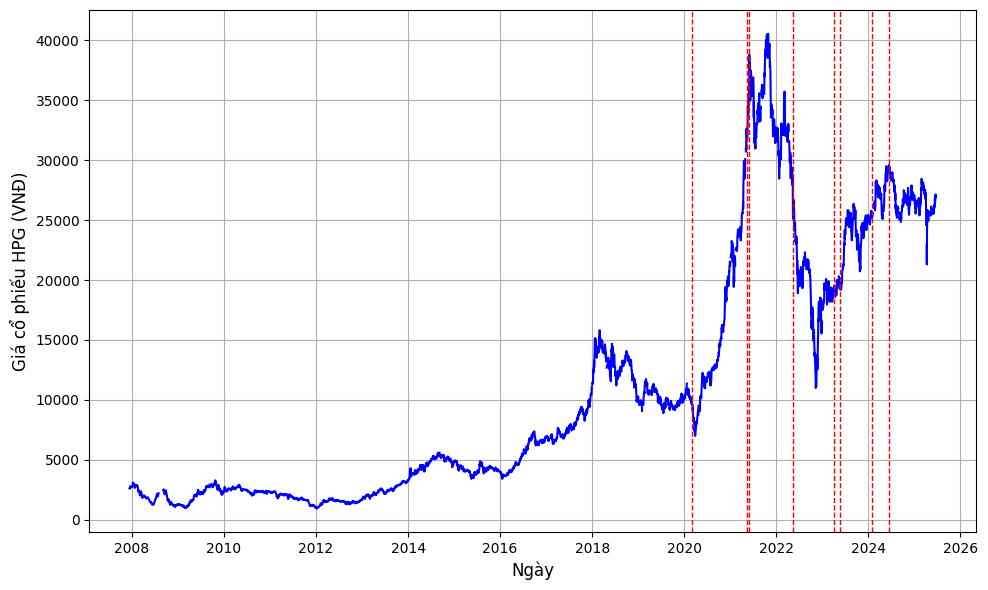

In [ ]:

# Task 3: Calculate annual drift and volatility of the share price
# Assuming 252 trading days in a year
annual_drift = data['Daily_Return'].mean() * 252
annual_volatility = data['Daily_Return'].std() * np.sqrt(252)
print("Annual Drift:", annual_drift)
print("Annual Volatility:", annual_volatility)

# Sample major events and their dates
major_events = {
    'Công bố KQKD Q1/2024': '2024-01-30',
    'Khởi công dự án Dung Quất 2': '2022-05-13',
    'Giá thép/quặng sắt đạt đỉnh': '2021-05-12',
    'Chính sách nhà ở xã hội (hỗ trợ BĐS)': '2023-04-01',
    'Chia cổ tức tiền mặt/cổ phiếu': ['2021-06-01', '2023-05-25', '2024-06-10'],
    'Tác động dịch COVID-19': '2020-03-01'
}

# Plot the share price with major events
event_order = ['Tác động dịch COVID-19',
    'Giá thép/quặng sắt đạt đỉnh',
    'Chia cổ tức tiền mặt/cổ phiếu',
    'Khởi công dự án Dung Quất 2',
    'Chính sách nhà ở xã hội (hỗ trợ BĐS)',
    'Công bố KQKD Q1/2024']

# Plot the share price with major events
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Adj Close'], label='Share Price', color='b')

# Plot major events with corresponding numbers
for i, event in enumerate(event_order, start=1):
    date = major_events[event]
    if isinstance(date, list):
        for d in date:
            plt.axvline(pd.to_datetime(d), color='r', linestyle='--', linewidth=1)
    else:
        plt.axvline(pd.to_datetime(date), color='r', linestyle='--', linewidth=1)

plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Giá cổ phiếu HPG (VNĐ)', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.grid(True)
plt.tight_layout()
plt.savefig('HPG_SharePrice_MajorEvents.png',dpi=300)
plt.show()

#Focus on key impactful milestones: Giá thép/quặng sắt đạt đỉnh; Chính sách nhà ở xã hội (hỗ trợ BĐS); COVID19

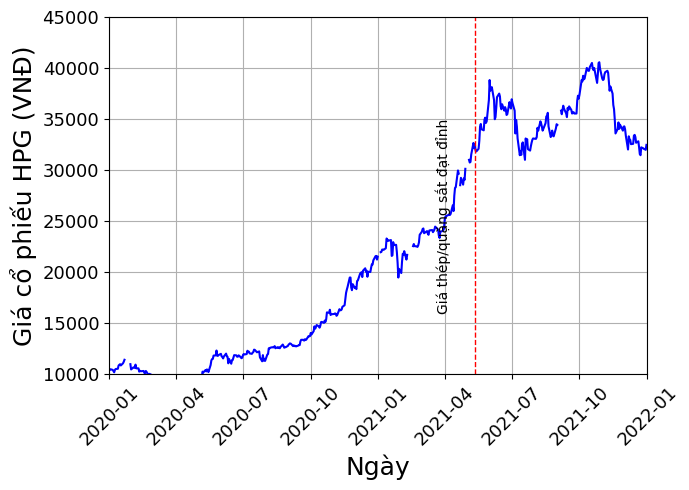

In [ ]:
# Biểu đồ: Giá thép/quặng sắt đạt đỉnh
plt.figure(figsize=(7, 5))
plt.plot(data.index, data['Adj Close'], label='Giá cổ phiếu', color='b')
plt.axvline(pd.to_datetime('2021-05-12'), color='r', linestyle='--', linewidth=1) # Ngày đỉnh điểm
plt.text(pd.to_datetime('2021-03-20'), 35000, 'Giá thép/quặng sắt đạt đỉnh', color='black', fontsize=10, rotation=90, va='top')
plt.xlim(pd.to_datetime('2020-01-01'), pd.to_datetime('2022-01-01'))
plt.ylim(10000, 45000)
plt.xlabel('Ngày', fontsize=18)
plt.ylabel('Giá cổ phiếu HPG (VNĐ)', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('HPG_GiaThep_Dinh.png', dpi=300)
plt.show()

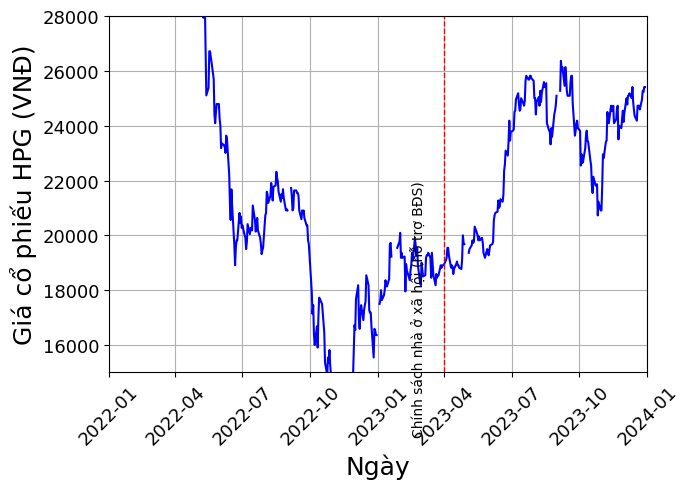

In [ ]:
# Biểu đồ: Chính sách nhà ở xã hội (hỗ trợ BĐS)
plt.figure(figsize=(7, 5))
plt.plot(data.index, data['Adj Close'], label='Giá cổ phiếu', color='b')
plt.axvline(pd.to_datetime('2023-04-01'), color='r', linestyle='--', linewidth=1) # Ngày công bố chính sách
plt.text(pd.to_datetime('2023-02-15'), 22000, 'Chính sách nhà ở xã hội (hỗ trợ BĐS)', color='black', fontsize=10, rotation=90, va='top')
plt.xlim(pd.to_datetime('2022-01-01'), pd.to_datetime('2024-01-01'))
plt.ylim(15000, 28000)
plt.xlabel('Ngày', fontsize=18)
plt.ylabel('Giá cổ phiếu HPG (VNĐ)', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('HPG_ChinhSachNhaO.png', dpi=300)
plt.show()

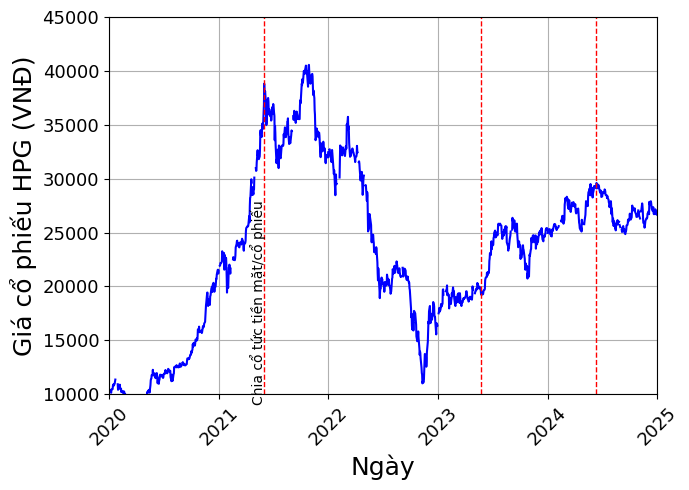

In [ ]:
# Biểu đồ: Chia cổ tức tiền mặt/cổ phiếu
# Đối với sự kiện này có nhiều ngày, chúng ta sẽ vẽ nhiều đường `axvline`
plt.figure(figsize=(7, 5))
plt.plot(data.index, data['Adj Close'], label='Giá cổ phiếu', color='b')
plt.axvline(pd.to_datetime('2021-06-01'), color='r', linestyle='--', linewidth=1) # Ngày chia cổ tức 2021
plt.axvline(pd.to_datetime('2023-05-25'), color='r', linestyle='--', linewidth=1) # Ngày chia cổ tức 2023
plt.axvline(pd.to_datetime('2024-06-10'), color='r', linestyle='--', linewidth=1) # Ngày chia cổ tức 2024
plt.text(pd.to_datetime('2021-04-15'), 28000, 'Chia cổ tức tiền mặt/cổ phiếu', color='black', fontsize=10, rotation=90, va='top')
plt.xlim(pd.to_datetime('2020-01-01'), pd.to_datetime('2025-01-01'))
plt.ylim(10000, 45000)
plt.xlabel('Ngày', fontsize=18)
plt.ylabel('Giá cổ phiếu HPG (VNĐ)', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('HPG_ChiaCoTuc.png', dpi=300)
plt.show()

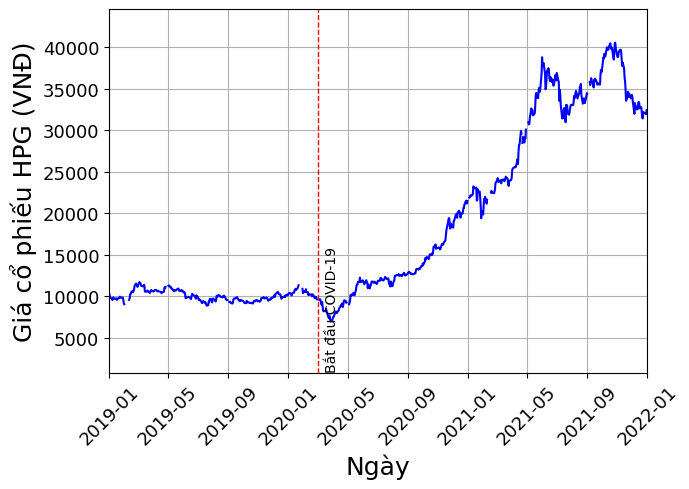

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


plt.figure(figsize=(7, 5))
plt.plot(data.index, data['Adj Close'], label='Giá cổ phiếu', color='b')
plt.axvline(pd.to_datetime('2020-03-01'), color='r', linestyle='--', linewidth=1)  # Ngày bắt đầu đại dịch
plt.text(pd.to_datetime('2020-03-15'), data['Adj Close'].min(),
         'Bắt đầu COVID-19', color='black', fontsize=10, rotation=90, va='bottom')
plt.xlim(pd.to_datetime('2019-01-01'), pd.to_datetime('2022-01-01'))
plt.ylim(data['Adj Close'].min()*0.9, data['Adj Close'].max()*1.1)
plt.xlabel('Ngày', fontsize=18)
plt.ylabel('Giá cổ phiếu HPG (VNĐ)', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('HPG_COVID19.png', dpi=300)
plt.show()


# Task 4: Estimate share price over the next quarter, 6 months, 1 year or longer

In [ ]:
# Assuming geometric Brownian motion for stock price
# Using the last available adjusted closing price as the current price
current_price = data['Adj Close'].iloc[-1]
num_simulations = 10000

# Lists to store results
next_quarter_prices = []
six_months_prices = []
one_year_prices = []
two_year_prices = []

# Loop for multiple simulations
for _ in range(num_simulations):
    # Next quarter price
    next_quarter_price = current_price * np.exp((annual_drift - 0.5 * (annual_volatility**2) * (1/4)) + (annual_volatility * np.random.normal(0, 1)))
    next_quarter_prices.append(next_quarter_price)

    # Six months price
    six_months_price = current_price * np.exp((annual_drift - 0.5 * (annual_volatility**2) * (1/2)) + (annual_volatility * np.random.normal(0, 1)))
    six_months_prices.append(six_months_price)

    # One year price
    one_year_price = current_price * np.exp((annual_drift - 0.5 * (annual_volatility**2)) + (annual_volatility * np.random.normal(0, 1)))
    one_year_prices.append(one_year_price)

    two_year_price = current_price * np.exp((annual_drift - 0.5 * (annual_volatility**2)) * 2 + (annual_volatility * np.random.normal(0, 1)))
    two_year_prices.append(two_year_price)

# Calculate averages
average_next_quarter_price = np.mean(next_quarter_prices)
std_next_quarter_price = np.std(next_quarter_prices)
average_six_months_price = np.mean(six_months_prices)
std_six_months_price = np.std(six_months_prices)
average_one_year_price = np.mean(one_year_prices)
std_one_year_price = np.std(one_year_prices)
average_two_year_price = np.mean(two_year_prices)
std_two_year_price = np.std(two_year_prices)

print("Average Next quarter price:", average_next_quarter_price)
print("STD of Next quarter price:", std_next_quarter_price)
print("Average Six months price:", average_six_months_price)
print("STD of Six months price:", std_six_months_price)
print("Average One year price:", average_one_year_price)
print("STD of One year price:", std_one_year_price)
print("Average Two year price:", average_two_year_price)
print("STD of Two year price:", std_two_year_price)

Average Next quarter price: 34096.64043369833
STD of Next quarter price: 12128.655257187158
Average Six months price: 33759.775828375285
STD of Six months price: 12041.05820371155
Average One year price: 32530.80703434676
STD of One year price: 11622.135300655267
Average Two year price: 36935.971130086706
STD of Two year price: 13153.584367044527


#3‑Month Treasury Rate from HNX

In [ ]:
!pip install selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import pandas as pd

options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(options=options)

url = 'https://www.hnx.vn/en-gb/trai-phieu/duong-cong-loi-suat.html?site=in'
driver.get(url)


time.sleep(5)

# Crawl table
table = driver.find_element(By.TAG_NAME, 'table')
rows = table.find_elements(By.TAG_NAME, 'tr')[1:]

RFR_data = []
for row in rows:
    cols = [col.text for col in row.find_elements(By.TAG_NAME, 'td')]
    RFR_data.append(cols)

driver.quit()


rate_3m = None
for row in RFR_data:
    if '3 months' in row[0].lower():
        rate_3m = float(row[1]) / 100
        break


if rate_3m is not None:
    print(f"3‑Month Treasury Rate from HNX: {rate_3m:.4f} or {rate_3m*100:.2f}%")
else:
    print("Not found 3‑Month Treasury Rate.")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.14.0
    Uninstalling typing_extensions-4.14.0:
      Successfully uninstalled typing_extensions-4.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 r

# Task 5: Calculate investment performance

In [ ]:
investment = 3000000  # Principal investment
final_value = current_price * (investment / data['Adj Close'].iloc[0])
return_on_investment = (final_value - investment) / investment * 100
max_value = data['Adj Close'].max() * (investment / data['Adj Close'].iloc[0])
max_date = data['Adj Close'].idxmax()
min_value = data['Adj Close'].min() * (investment / data['Adj Close'].iloc[0])
min_date = data['Adj Close'].idxmin()
print("Final value of investment:", final_value)
print("Return on investment (%):", return_on_investment)
print("Maximum value of investment:", max_value)
print("Minimum value of investment:", min_value)
print("Date of maximum value:", max_date)
print('Maximum value of share price', data['Adj Close'].max())
print("Date of minimum value:", min_date)
print('Minimum value of share price', data['Adj Close'].min())

# Task 5 (iii): Calculate return on investment in a savings account
RFR_HNX = rate_3m
savings_final_value = investment * np.exp(RFR_HNX * 27)  # considering 5 years
savings_return = (savings_final_value - investment) / investment * 100
print("Final value of investment in savings account:", savings_final_value)
print("Return on investment in savings account (%):", savings_return)

# Task 5 (iv): Advise a client on investing in the stock versus a bank account
if annual_volatility > RFR_HNX:
    print("Considering the volatility, investing in the stock may yield higher returns but with higher risk.")
else:
    print("Considering the low volatility, investing in a savings account may provide stable returns.")

Final value of investment: 30955476.590122044
Return on investment (%): 931.8492196707348
Maximum value of investment: 46501364.41021043
Minimum value of investment: 1073076.9338672438
Date of maximum value: 2021-10-28 00:00:00
Maximum value of share price 40559.44141
Date of minimum value: 2012-01-09 00:00:00
Minimum value of share price 935.9596558
Final value of investment in savings account: 5412920.875305271
Return on investment in savings account (%): 80.43069584350903
Considering the volatility, investing in the stock may yield higher returns but with higher risk.


# PART 2 - BINOMIAL MODEL


Call Option:
Upward Movement (u): 1.1033308369260828
Downward Movement (d): 0.90634646157995
Risk-Neutral Probability (p): 0.4844127193812365
Option Price: 740.8026095084698

Put Option:
Upward Movement (u): 1.1033308369260828
Downward Movement (d): 0.90634646157995
Risk-Neutral Probability (p): 0.4844127193812365
Option Price: 561.698102669764
0.16164383561643836


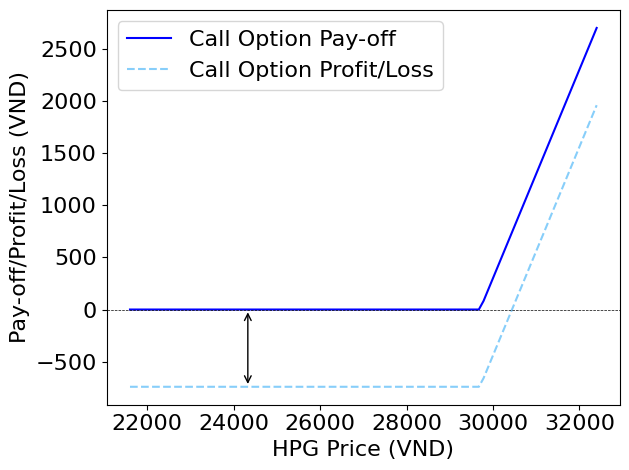

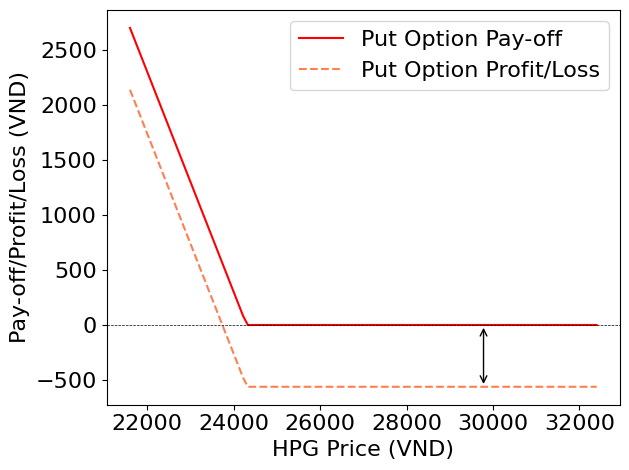

In [ ]:
# Function that retrieves probabilities for up, down and neutral movements.
def Binomial(S,K,r,sigma,T,n,otype, EuOrAm):
    #This function calculate the up, down ratio
    #and the risk-neutral probability
    #Inputs:
    #S: start price
    #K: strike price
    #r: risk-free rate
    #sigma: volatility
    #T: Maturity time
    #n: number of steps
    # We calculate the time step size
    dt=T/n
    #We apply the u and d formulation
    u=np.exp(sigma*np.sqrt(dt))
    d=1/u
    #Then, we calculate the risk-neutral probability
    p=(np.exp(r*dt) -d)/(u-d)
    #We create a matrix to store the prices
    Stree=np.zeros((n+1, n+1))
    #We create a matrix to store the intrinic value
    Intrinsic=np.zeros((n+1, n+1))
    #We create a matrix to store the option value
    Option=np.zeros((n+1, n+1))
    #For each path
    for j in range(0,n+1):
    #For each time step
        for i in range(0,j+1):
        #The nodes are powers of u and d
            Stree[i,j] = S*(u**(j-i))*(d**(i))
            #Depending if is a call or a put
            #we apply a different payoff function
            if otype=="call":
                Intrinsic[i,j]=np.maximum(Stree[i,j]-K,0)
            elif otype=="put":
                Intrinsic[i,j]=np.maximum(K-Stree[i,j],0)
            else:
                print("Wrong option type. Please write call or put")
    #For each path
    for j in range(n,-1,-1):
    #For each time step
        for i in range(0, j+1):
            if j==n:
                Option[i,j] = Intrinsic[i,j]
            else:
                Option[i,j] = np.exp(-r*dt)*(Option[i,j+1]*p\
                + Option[i+1,j+1]*(1-p))
                #If it is American, we compare the option at the node
                #with its intrinsic value.
                #Choosing the maximum.
                if EuOrAm=="American":
                    Option[i,j]=np.maximum(Intrinsic[i,j],Option[i,j])
                    print("The Option price is", Option [0,0])

    return (u, d, p, Stree, Intrinsic, Option)



S = data['Adj Close'].iloc[-1]  # Current share price (adjusted closing price)
K_call = S * 1.10  # Strike price for Call option (10% above current share price)
K_put = S * 0.90  # Strike price for Put option (10% below current share price)
r = rate_3m  # Risk-free interest rate (VN rate)
sigma =annual_volatility  # Volatility
T = (pd.to_datetime('2025-08-22') - pd.to_datetime('today')).days / 365      # Time to expiration (2 months)
n = 2        # Number of steps
otype_call = "call"  # Option type: call
otype_put = "put"    # Option type: put
EuOrAm = "European"  # Option style: American

# Calculate probabilities, up, down, and neutral movements for Call option
u_call, d_call, p_call, _, _, Option_call = Binomial(S, K_call, r, sigma, T, n, otype_call, EuOrAm)

# Calculate probabilities, up, down, and neutral movements for Put option
u_put, d_put, p_put, _, _, Option_put = Binomial(S, K_put, r, sigma, T, n, otype_put, EuOrAm)

print("Call Option:")
print("Upward Movement (u):", u_call)
print("Downward Movement (d):", d_call)
print("Risk-Neutral Probability (p):", p_call)
print("Option Price:", Option_call[0, 0])

print("\nPut Option:")
print("Upward Movement (u):", u_put)
print("Downward Movement (d):", d_put)
print("Risk-Neutral Probability (p):", p_put)
print("Option Price:", Option_put[0, 0])
print(T)
S_range = np.linspace(0.8 * S, 1.2 * S, 100)

payoff_call = np.maximum(0, S_range - K_call)
payoff_put = np.maximum(0, K_put - S_range)
premium_call = Option_call[0, 0]
premium_put = Option_put[0, 0]

# Calculate profit/loss for call option
profit_call = payoff_call - premium_call

# Calculate profit/loss for put option
profit_put = payoff_put - premium_put

plt.plot(S_range, payoff_call, label='Call Option Pay-off', color='blue')
plt.plot(S_range, profit_call, label='Call Option Profit/Loss', linestyle='--', color='lightskyblue')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)  # Zero line
plt.xlabel('HPG Price (VND)',fontsize=16)
plt.ylabel('Pay-off/Profit/Loss (VND)',fontsize=16)
plt.annotate('', xy=(S_range[25], -premium_call), xytext=(S_range[25], 0),
             arrowprops=dict(facecolor='black', arrowstyle='<->'), fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize=16)

plt.tight_layout()
plt.savefig('CallOptionProfit.png',dpi=610)
plt.show()

plt.plot(S_range, payoff_put, label='Put Option Pay-off', color='red')
plt.plot(S_range, profit_put, label='Put Option Profit/Loss', linestyle='--', color='coral')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)  # Zero line
plt.xlabel('HPG Price (VND)',fontsize=16)
plt.ylabel('Pay-off/Profit/Loss (VND)',fontsize=16)
plt.annotate('', xy=(S_range[75], -premium_put), xytext=(S_range[75], 0),
             arrowprops=dict(facecolor='black', arrowstyle='<->'), fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize=16)

plt.tight_layout()
plt.savefig('PutOptionProfit.png',dpi=610)

plt.show()